# Ternary package
https://github.com/marcharper/python-ternary

In [7]:
import ternary
from matplotlib import pyplot as plt
import math, random

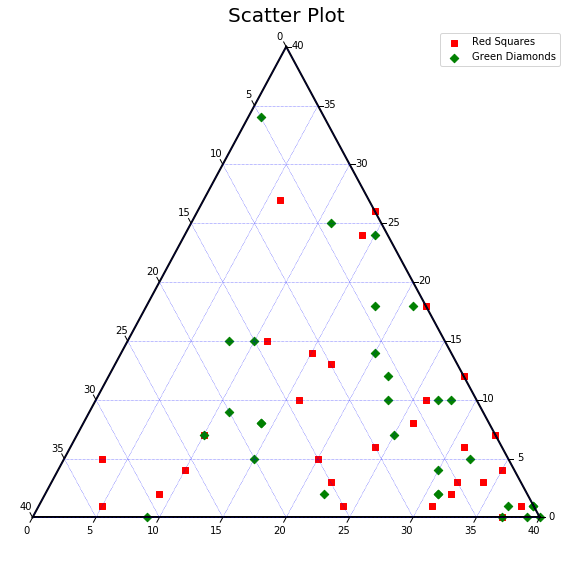

In [2]:
## Generate Data
import random

def random_points(num_points=25, scale=40):
    points = []
    for i in range(num_points):
        x = random.randint(1, scale)
        y = random.randint(0, scale - x)
        z = scale - x - y
        points.append((x,y,z))
    return points

# Scatter Plot
scale = 40
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(10, 10)
# Plot a few different styles with a legend
points = random_points(30, scale=scale)
tax.scatter(points, marker='s', color='red', label="Red Squares")
points = random_points(30, scale=scale)
tax.scatter(points, marker='D', color='green', label="Green Diamonds")
tax.legend()

tax.set_title("Scatter Plot", fontsize=20)
tax.boundary(linewidth=2.0)
tax.gridlines(multiple=5, color="blue")
tax.ticks(axis='lbr', linewidth=1, multiple=5)
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')

tax.show()

In [3]:
points

[(31, 2, 7),
 (37, 1, 2),
 (23, 10, 7),
 (40, 0, 0),
 (30, 4, 6),
 (32, 5, 3),
 (31, 2, 7),
 (11, 9, 20),
 (9, 0, 31),
 (39, 0, 1),
 (28, 10, 2),
 (22, 12, 6),
 (15, 5, 20),
 (1, 34, 5),
 (39, 1, 0),
 (11, 25, 4),
 (15, 24, 1),
 (14, 8, 18),
 (20, 14, 6),
 (14, 8, 18),
 (10, 15, 15),
 (10, 7, 23),
 (8, 15, 17),
 (21, 18, 1),
 (22, 2, 16),
 (25, 7, 8),
 (27, 10, 3),
 (39, 1, 0),
 (37, 0, 3),
 (18, 18, 4)]

In [8]:
def shannon_entropy(p):
    """Computes the Shannon Entropy at a distribution in the simplex."""
    s = 0.
    for i in range(len(p)):
        try:
            s += p[i] * math.log(p[i])
        except ValueError:
            continue
    return -1.*s

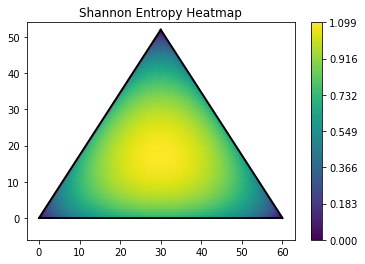

In [9]:
scale = 60

figure, tax = ternary.figure(scale=scale)
tax.heatmapf(shannon_entropy, boundary=True, style="triangular")
tax.boundary(linewidth=2.0)
tax.set_title("Shannon Entropy Heatmap")

tax.show()

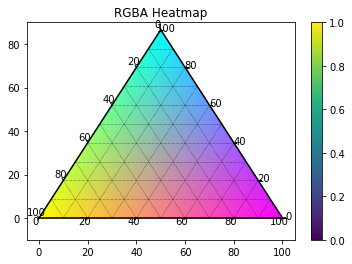

In [40]:
def color_point(x, y, z, scale):
    w = 255
    x_color = x * w / float(scale)
    y_color = y * w / float(scale)
    z_color = z * w / float(scale)
    r = math.fabs(w - y_color) / w
    g = math.fabs(w - x_color) / w
    b = math.fabs(w - z_color) / w
    return (r, g, b, 1.)


def generate_heatmap_data(scale=5):
    from ternary.helpers import simplex_iterator
    d = dict()
    for (i, j, k) in simplex_iterator(scale):
        d[(i, j, k)] = color_point(i, j, k, scale)
    return d


scale = 100
data = generate_heatmap_data(scale)
figure, tax = ternary.figure(scale=scale)
tax.heatmap(data, style="hexagonal", use_rgba=True)
tax.ticks(axis='lbr', linewidth=1, multiple=20)
tax.gridlines(multiple=10, color="black")
tax.boundary()
tax.set_title("RGBA Heatmap")
plt.show()

In [41]:
generate_heatmap_data(3)

{(0, 0, 3): (1.0, 1.0, 0.0, 1.0),
 (0, 1, 2): (0.6666666666666666, 1.0, 0.3333333333333333, 1.0),
 (0, 2, 1): (0.3333333333333333, 1.0, 0.6666666666666666, 1.0),
 (0, 3, 0): (0.0, 1.0, 1.0, 1.0),
 (1, 0, 2): (1.0, 0.6666666666666666, 0.3333333333333333, 1.0),
 (1, 1, 1): (0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 1.0),
 (1, 2, 0): (0.3333333333333333, 0.6666666666666666, 1.0, 1.0),
 (2, 0, 1): (1.0, 0.3333333333333333, 0.6666666666666666, 1.0),
 (2, 1, 0): (0.6666666666666666, 0.3333333333333333, 1.0, 1.0),
 (3, 0, 0): (1.0, 0.0, 1.0, 1.0)}

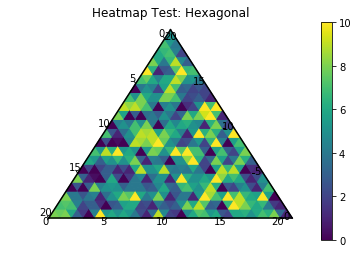

In [56]:
def generate_random_heatmap_data(scale=5):
    from ternary.helpers import simplex_iterator
    d = dict()
    for (i,j,k) in simplex_iterator(scale):
        d[(i,j)] = random.randint(0,10)
    return d

scale = 20
d = generate_random_heatmap_data(scale)
figure, tax = ternary.figure(scale=scale)
tax.heatmap(d, style="dual-triagonal")
tax.boundary()
tax.get_axes().axis('off')
tax.ticks(axis='lbr', linewidth=1, multiple=5)
tax.set_title("Heatmap Test: Hexagonal")

In [50]:
random.random(0, 10)

TypeError: random() takes no arguments (2 given)

In [13]:
d

{(0, 0): 0.46256277894167364,
 (0, 1): 0.3164727899599683,
 (0, 2): 0.05725346722085256,
 (0, 3): 0.9508208150458491,
 (0, 4): 0.003496803981757224,
 (0, 5): 0.470605894372616,
 (0, 6): 0.954332477259194,
 (0, 7): 0.6434713878547624,
 (0, 8): 0.7242609523544815,
 (0, 9): 0.8958244128956259,
 (0, 10): 0.9815298208705456,
 (0, 11): 0.25819838839317655,
 (0, 12): 0.6414377867367926,
 (0, 13): 0.4697758195616667,
 (0, 14): 0.7153390509623844,
 (0, 15): 0.5104457565492493,
 (0, 16): 0.2097281167513163,
 (0, 17): 0.5073949518727389,
 (0, 18): 0.10278360950650267,
 (0, 19): 0.06426070401442896,
 (0, 20): 0.5192581610305506,
 (1, 0): 0.5143604145953399,
 (1, 1): 0.04958042152610875,
 (1, 2): 0.21789711651749577,
 (1, 3): 0.7489006152512948,
 (1, 4): 0.43797035317296096,
 (1, 5): 0.8655001666646406,
 (1, 6): 0.609772637574609,
 (1, 7): 0.4252674804971972,
 (1, 8): 0.19509618160857112,
 (1, 9): 0.09607164710901717,
 (1, 10): 0.4938083283185868,
 (1, 11): 0.2363414895886614,
 (1, 12): 0.097867999

In [17]:
import pandas as pd

In [74]:
sd = pd.read_csv('~/Downloads/sample_heatmap_data.txt', sep=' ', header=None, index_col=[0,1,2])
sdd = sd.to_dict()[3]

## Rupert's data

In [91]:
rjm = pd.read_excel('~/Downloads/mmc1.xlsx', 
                    skiprows=[0], usecols=[0,1,2,29],
                   index_col=[0,1,2])

In [95]:
d = rjm.to_dict()
d = {k[0:2]: d['Mg'][k] for k in d['Mg']}

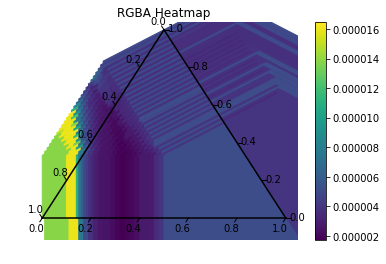

In [96]:
scale = 1
figure, tax = ternary.figure(scale=scale)
tax.heatmap(d, style="hexagonal")
tax.boundary()
tax.ticks(axis='lbr', multiple=0.2, linewidth=1, tick_formats="%.1f", offset=0.02)
tax.get_axes().axis('off')
tax.set_title("RGBA Heatmap")
plt.show()

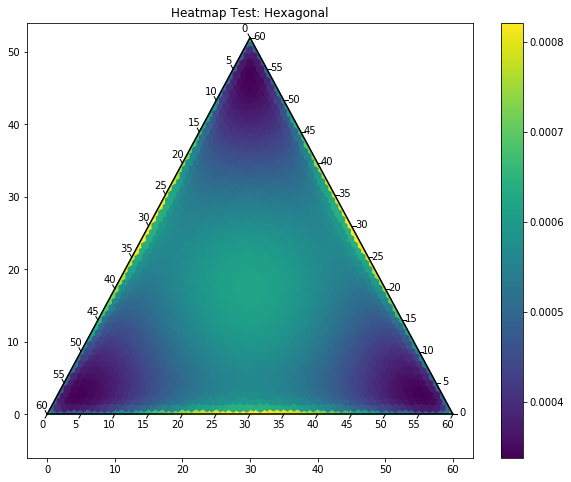

In [79]:
scale = 60
d = rjm.to_dict()
d = {k[0:2]: d['Al'][k] for k in d['Al']}
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(10, 8)
tax.heatmap(sdd, style="hexagonal")
tax.boundary()
tax.ticks(axis='lbr', linewidth=1, multiple=5)
tax.set_title("Heatmap Test: Hexagonal")

# Plot.ly 

https://nbviewer.jupyter.org/github/empet/Ternary-contour-plot/blob/master/Plotly-ternary-contour-plot.ipynb

In [2]:
import platform
import plotly

import plotly.graph_objs as go
import numpy as np
from scipy.interpolate import griddata

In [3]:
A = np.array([0, .3 ,.25, .34 ,0, .4 ,.65, 0.05,  0,  1, .47, .2, .7])  #pos 10 1, 0, 0
B = np.array([1, .1, .45, .56, 0, .5, .3,  0.75, .85, 0,  .33, .3, .13])
C = np.array([0, .6 ,.3,  .1,  1, .1, .05,  .2,  .15, 0,  .2,  .5, .17])

z=np.array([1.27036107, 1.27893858, 0.52255697, 1.50035059, 0.84853798,
       1.27722501, 1.20920733, 0.88965008, 0.59293362, 0.9223051 ,
       1.57173859, 1.33606612, 1.08977333])
A+B+C

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [4]:
pl_ternary=dict(type='scatterternary',
                a=A,
                b=B, 
                c=C,
                mode='markers',
                marker=dict(size=10, color='red'))

layout=dict(width=500, height=400,
            ternary= {'sum':1,
                      'aaxis':{'title': 'a',  'min': 0.001, 'linewidth':0.5, 'ticks':'outside' },
                      'baxis':{'title': 'b',  'min': 0.001, 'linewidth':0.5, 'ticks':'outside' },
                      'caxis':{'title': 'c',  'min': 0.001, 'linewidth':0.5, 'ticks':'outside' }},
            showlegend= False,
            paper_bgcolor='#EBF0F8')

fw=go.FigureWidget(data=[pl_ternary], layout=layout)
fw #this plot is visible only when the notebook is run

FigureWidget({
    'data': [{'a': array([0.  , 0.3 , 0.25, 0.34, 0.  , 0.4 , 0.65, 0.05, 0.  , 1.  , 0.47, 0.2…

In [5]:
def tr_b2c2b():
    # returns the transformation matrix from barycentric to cartesian coordinates and conversely
    tri_verts = np.array([[0.5, np.sqrt(3)/2], [0, 0], [1, 0]])# reference triangle
    M = np.array([tri_verts[:,0], tri_verts[:, 1], np.ones(3)]) 
    return M, np.linalg.inv(M)

In [6]:
def contour_trace(x, y, z, tooltip, 
                  colorscale='Viridis', reversescale=False,
                  linewidth=0.5, linecolor='rgb(150,150,150)'):
                  
    return  dict(type='contour',
                 x=x,
                 y=y,    
                 z=z,
                 text=tooltip,
                 hoverinfo='text',    
                 colorscale=colorscale,
                 reversescale=reversescale,
                 line=dict(width=linewidth, color=linecolor),
                 colorbar=dict(thickness=20, ticklen=4))

In [7]:
def barycentric_ticks(side):
    # side 0, 1 or  2; side j has 0 in the  j^th position of barycentric coords of tick origin
    # returns the list of tick origin barycentric coords
    p = 10
    if side == 0: #where a=0
        return np.array([(0, j/p, 1-j/p) for j in range(p-2, 0, -2)])
    elif side == 1: # b=0
        return np.array([(i/p, 0, 1-i/p)  for i in  range( 2, p, 2) ])
    elif side == 2: #c=0
        return np.array([(i/p, j/p, 0)  for i in range(p-2, 0, -2) for j in range(p-i, -1, -1)  if i+j==p])
    else:
        raise ValueError('The side can be only 0, 1, 2')



def cart_coord_ticks(side, t=0.01):
    # side 0, 1 or 2
    # each tick segment is parameterized as (x(s), y(s)), s in [0, t]
    global  M, xt, yt, posx, posy
    # M is the transformation matrix from barycentric to cartesian coords
    # xt, yt are the lists of x, resp y-coords of tick segments
    # posx, posy are the lists of ticklabel positions for side 0, 1, 2 (concatenated)
    
    baryc = barycentric_ticks(side)
    xy1 = np.dot(M, baryc.T)
    xs, ys = xy1[:2] 
    
    if side == 0:
        for i in range(4):
            xt.extend([xs[i], xs[i]+t, None])
            yt.extend([ys[i], ys[i]-np.sqrt(3)*t, None])
        posx.extend([xs[i]+t for i in range(4)])
        posy.extend([ys[i]-np.sqrt(3)*t for i in range(4)])
        
    elif  side == 1:
        for i in range(4):
            xt.extend([xs[i], xs[i]+t, None])
            yt.extend([ys[i], ys[i]+np.sqrt(3)*t, None])
        posx.extend([xs[i]+t for i in range(4)]) 
        posy.extend([ys[i]+np.sqrt(3)*t for i in range(4)])
        
    elif side == 2:
        for i in range(4):
            xt.extend([xs[i], xs[i]-2*t, None])
            yt.extend([ys[i], ys[i], None])
        posx.extend([xs[i]-2*t for i in range(4)])
        posy.extend([ys[i] for i in range(4)]) 
    else:
        raise ValueError('side can be only 0,1,2')

In [8]:
def ternary_layout(title='Ternary contour plot', width=550, height=525, 
                   fontfamily= 'Balto, sans-serif' , lfontsize=14,
                   plot_bgcolor='rgb(240,240,240)',
                   vertex_text=['a', 'b', 'c'], v_fontsize=14):

     return dict(title=title,
                 font=dict(family=fontfamily, size=lfontsize),
                 width=width, height=height,
                 xaxis=dict(visible=False),
                 yaxis=dict(visible=False),
                 plot_bgcolor=plot_bgcolor,
                 showlegend=False,
                 #annotations for strings  placed at the triangle vertices
                 annotations=[dict(showarrow=False,
                                   text=vertex_text[0],
                                   x=0.5,
                                   y=np.sqrt(3)/2,
                                   align='center',
                                   xanchor='center',
                                   yanchor='bottom',
                                   font=dict(size=v_fontsize)),
                              dict(showarrow=False,
                                   text=vertex_text[1],
                                   x=0,
                                   y=0,
                                   align='left',
                                   xanchor='right',
                                   yanchor='top',
                                   font=dict(size=v_fontsize)),
                              dict(showarrow=False,
                                   text=vertex_text[2],
                                   x=1,
                                   y=0,
                                   align='right',
                                   xanchor='left',
                                   yanchor='top',
                                   font=dict(size=v_fontsize))
                              ])

In [9]:
def set_ticklabels(annotations, posx, posy, proportion=True):
    #annotations: list of annotations previously defined in layout definition as a dict,
    #     not as an instance of go.Layout
    #posx, posy:  lists containing ticklabel position coordinates
    #proportion - boolean; True when ticklabels are 0.2, 0.4, ... False when they are 20%, 40%...
    
    if not isinstance(annotations, list):
        raise ValueError('annotations should be a list')
        
    ticklabel = [0.8, 0.6, 0.4, 0.2] if proportion else ['80%', '60%', '40%', '20%'] 
    
    annotations.extend([dict(showarrow=False, # annotations for ticklabels on side 0
                             text=f'{ticklabel[j]}',
                             x=posx[j],
                             y=posy[j],
                             align='center',
                             xanchor='center', 
                             yanchor='top',
                             font=dict(size=12)) for j in range(4)])
    
    annotations.extend([dict(showarrow=False, # annotations for ticklabels on  side 1
                             text=f'{ticklabel[j]}',
                             x=posx[j+4],
                             y=posy[j+4],
                             align='center',
                             xanchor='left', 
                             yanchor='middle',
                             font=dict(size=12)) for j in range(4)])

    annotations.extend([dict(showarrow=False, # annotations for ticklabels on side 2
                             text=f'{ticklabel[j]}',
                             x=posx[j+8],
                             y=posy[j+8],
                             align='center',
                             xanchor='right', 
                             yanchor='middle',
                             font=dict(size=12)) for j in range(4)])
    return annotations

In [10]:
def styling_traces():
    global xt, yt
    side_trace = dict(type='scatter',
                      x=[0.5, 0, 1, 0.5],
                      y=[np.sqrt(3)/2, 0, 0, np.sqrt(3)/2],
                      mode='lines',
                      line=dict(width=2, color='#444444'),
                      hoverinfo='none')
    
    tick_trace = dict(type='scatter',
                      x=xt,
                      y=yt,
                      mode='lines',
                      line=dict(width=1, color='#444444'),
                      hoverinfo='none')
    
    return side_trace, tick_trace


In [11]:
M, invM =  tr_b2c2b()

In [12]:
cartes_coord_points = np.einsum('ik, kj -> ij', M, np.stack((A, B, C)))
xx, yy = cartes_coord_points[:2]

In [13]:
a, b = xx.min(), xx.max()
c, d = yy.min(), yy.max()

In [ ]:
N=150
gr_x = np.linspace(a,b, N)
gr_y = np.linspace(c,d, N)
grid_x, grid_y = np.meshgrid(gr_x, gr_y)

#interpolate data (cartes_coords[:2].T; z)  and evaluate the  interpolatory function at the meshgrid points to get grid_z
grid_z = griddata(cartes_coord_points[:2].T, z, (grid_x, grid_y), method='cubic')

In [1]:
bar_coords = np.einsum('ik, kmn -> imn', invM, np.stack((grid_x, grid_y, np.ones(grid_x.shape))))
bar_coords[np.where(bar_coords<0)] = None # invalidate the points outside of the reference triangle
xy1 = np.einsum('ik, kmn -> imn', M, bar_coords) # recompute back the cartesian coordinates of bar_coords with invalid positions
                                               # and extract indices where x are nan

I = np.where(np.isnan(xy1[0]))
grid_z[I] = None

NameError: name 'np' is not defined

In [5]:
import plotly
import plotly.graph_objs as go

# sample data
f1 = [31.83, 39.93, 29.15, 42.36, 432.88, 43.05, 31.32, 0.57, 424.19, 320.1, 48.16, 123.67, 176.99, 342.0, 174.84, 271.27, 115.15]
f2 = [110.8, 124.34, 132.07, 82.14, 213.04, 91.47, 133.31, 211.26, 224.33, 201.46, 59.5, 154.9, 163.59, 231.25, 123.57, 119.6, 186.35]
f3 = [59.92, 87.86, 114.43, 57.99, 364.05, 1910.65, 1196.43, 931.8, 134.58, 233.37, 80.92, 194.15, 121.22, 166.59, 142.02, 340.56, 357.92]

# trace creation
trace1 = go.Scatterternary(
a = f1,
b = f2,
c = f3,
mode='markers',
)
# plot plotting
data = [trace1]
fig = go.Figure(data=data) 
plotly.offline.plot(fig)

'file:///Users/n/code/panoramix/notebooks/temp-plot.html'

In [6]:
xt = []
yt = []
posx = []
posy = []
for side in [0, 1, 2]:
    cart_coord_ticks(side, t=0.01)


tooltip = t_proportions
layout = ternary_layout()
annotations = set_ticklabels(layout['annotations'], posx, posy, proportion=True)

c_trace = contour_trace(gr_x, gr_y, grid_z, tooltip, colorscale=pl_deep, reversescale=True)
side_trace, tick_trace =styling_traces()
fw1 = go.FigureWidget(data=[c_trace,  tick_trace, side_trace], layout=layout)
fw1.layout.annotations=annotations
    

NameError: name 'cart_coord_ticks' is not defined

In [7]:
!pip install python-ternary